# AI4D Swahili News Classification Challenge

Kiswahili is a lingua franca spoken by 100-150 million people across East Africa. It is an official language in the DRC, Kenya, Tanzania, and Uganda; in Tanzania it is a first language for most people and the official language of instruction in all schools, while in other countries it is a common second language. News in Kiswahili is an important part of the media sphere in East Africa.

News contributes to education, technology, and economic growth of a country, and news in local languages plays an important cultural role in many Africa countries. In the modern age, African languages in news and other spheres are at risk of being lost as English becomes the dominant language in online spaces.

The objective of this hackathon is to develop a multi-class classification model to classify news content according to six specific categories.The model can be used by Swahili online platforms to automatically group news according to their categories and help readers find the specific news they want to read. In addition, the model will contribute to a body of work ensuring that Swahili is represented in apps and other online products in future.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime as dt                           #convert date formats
from scipy import stats                         #statistical analysis
from IPython.display import display 
import matplotlib.pyplot as plt
%matplotlib inline
#
import seaborn as sns
sns.set()
import gc     

In [2]:
#Setting styles and aesthetics
pd.set_option('display.max_columns', 200)
pd.options.display.max_rows =30
pd.options.display.float_format = '{:,.2f}'.format

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 8)

# Graphics in SVG format are more sharp and legible
#%config InlineBackend.figure_format = 'svg'

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_copy = test.copy()

In [4]:
# Check The Shape Of The Data Loaded
print('Train data shape: {} Rows, {} Columns'.format(*train.shape))
print('Test data shape: {} Rows, {} Columns'.format(*test.shape))

Train data shape: 23268 Rows, 3 Columns
Test data shape: 7756 Rows, 2 Columns


In [5]:
# Print First Few Rows Of The Data
display("Train data")
display(train.head(3))
display(train.tail(3))
display("test data")
display(test.head(3))
display(test.tail(3))

'Train data'

id                                            content category
0   SW4670   Bodi ya Utalii Tanzania (TTB) imesema, itafan...   uchumi
1  SW30826   PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...  kitaifa
2  SW29725  Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...   uchumi

id                                            content category
23265  SW16649   Mkuu wa Mkoa wa Njombe, Dk Rehema Nchimbi wak...   uchumi
23266  SW23291   MABINGWA wa Ligi Kuu Soka Tanzania Bara, Simb...  michezo
23267  SW11778   WIKI iliyopita, nilianza makala haya yanayole...  kitaifa

'test data'

id                                            content
0   SW4255   WAZIRI MKUU Kassim Majaliwa amep okea leseni ...
1  SW15677   RAIS John Magufuli amewataka viongozi wa Halm...
2  SW15925  NEW YORK, MAREKANI MKALI wa hip hop nchini Mar...

id                                            content
7753  SW20243  \n\tNa JUDITH NYANGE-MWANZA\n \n\n \n\tKAMPUNI...
7754  SW27943   WAZIRI wa Ulinzi, Dk Hussein Mwinyi vijana wa...
7755  SW22906  WAANDISHI WETU – DAR/MIKOANI KASI ya virusi vy...

In [6]:
train['set'] = 'train'
test['set'] = 'test'
test['category'] = np.nan
#
data = pd.concat([train[['content', 'category', 'set']], test[['content', 'category', 'set']]], axis=0)

In [7]:
#train data pandas profiling
from pandas_profiling import ProfileReport
#
profile = ProfileReport(train)
profile.to_file(output_file='Train_Profiling_Report.html')
#
#test data pandas profiling
profile = ProfileReport(test)
profile.to_file(output_file='Test_Profiling.html')

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

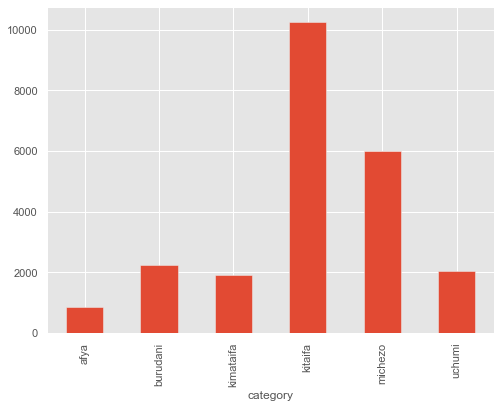

In [8]:
fig = plt.figure(figsize=(8,6))
train.groupby('category').content.count().plot.bar(ylim=0)
plt.show()

In [9]:
import texthero as hero
data['clean_content'] = hero.clean(data['content'])
data.head(3)

content category    set  \
0   Bodi ya Utalii Tanzania (TTB) imesema, itafan...   uchumi  train   
1   PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...  kitaifa  train   
2  Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...   uchumi  train   

                                       clean_content  
0  bodi ya utalii tanzania ttb imesema itafanya m...  
1  pendo fundisha mbeya rais dk john magufuri ame...  
2  mwandishi wetu singida benki ya nmb imetoa msa...

In [10]:
# create custom pipeline
#from texthero import preprocessing

#custom_pipeline = [
#    preprocessing.fillna,
#    preprocessing.lowercase,
#    preprocessing.remove_whitespace,
#   preprocessing.remove_punctuation,
#    preprocessing.remove_urls,
#]
# altearnative for custom pipeline
#news_content["clean_custom_content"] = news_content["content"].pipe(
#    hero.clean, custom_pipeline
#)

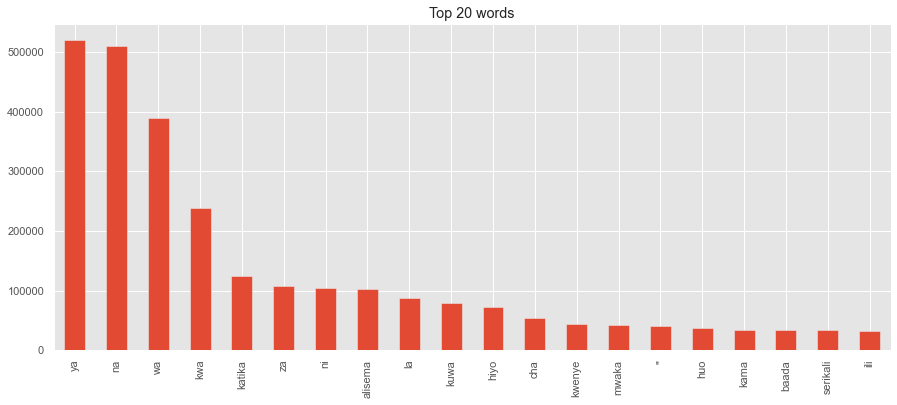

In [11]:
import matplotlib.pyplot as plt
from pylab import rcParams
#
rcParams["figure.figsize"] = 15, 6
#
top_20 = hero.visualization.top_words(data["clean_content"]).head(20)
# Draw the bar chart
top_20.plot.bar(rot=90, title="Top 20 words")
plt.show(block=True)

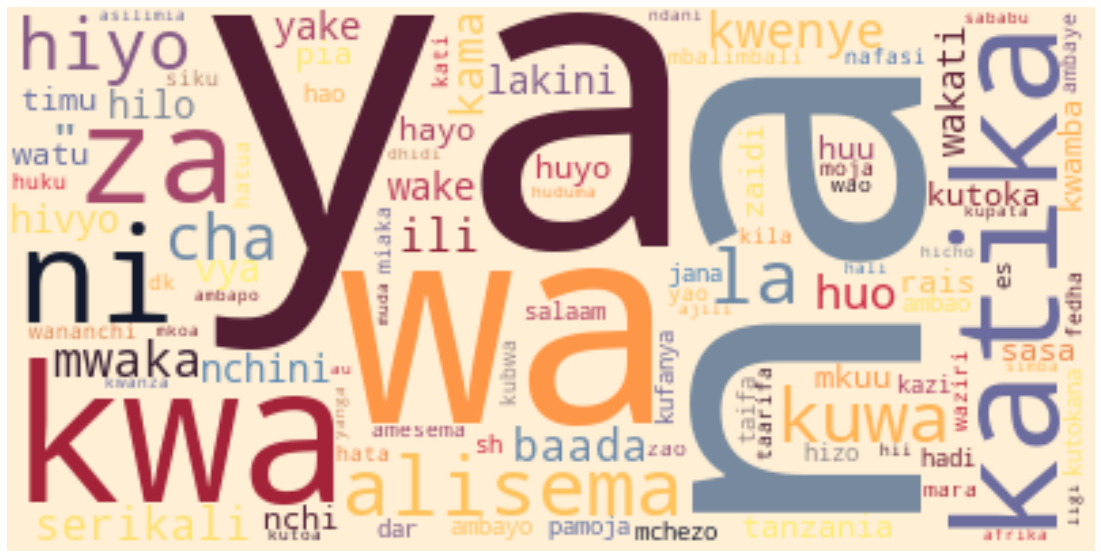

In [12]:
# Plot wordcloud image using WordCloud
hero.wordcloud(
    data.clean_content, max_words=100,
)

In [13]:
NUM_TOP_WORDS = 5
data.groupby('category')['clean_content'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

category          
afya       na          19094
           ya          18720
           wa          12274
           kwa          9639
           ni           5028
burudani   na          23740
           ya          17274
           wa          14024
           kwa          9916
           ni           6025
kimataifa  ya          29680
           wa          25449
           na          24629
           kwa         11146
           katika       7491
kitaifa    na         207670
           ya         203018
           wa         155588
           kwa         94875
           alisema     49755
michezo    ya          88352
           na          76449
           wa          60009
           kwa         34305
           katika      21070
uchumi     ya          34300
           na          32428
           wa          24485
           kwa         19662
           za           9034
Name: clean_content, dtype: int64

In [14]:
data['target'] = data['category'].astype('category').cat.codes
data

content category    set  \
0      Bodi ya Utalii Tanzania (TTB) imesema, itafan...   uchumi  train   
1      PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...  kitaifa  train   
2     Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...   uchumi  train   
3      TIMU ya taifa ya Tanzania, Serengeti Boys jan...  michezo  train   
4      Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...  kitaifa  train   
...                                                 ...      ...    ...   
7751  \n\n \nNa Ibrahim Yassin-Nkasi\n \n\tMWANAFUNZ...      NaN   test   
7752  BAADA ya R. Kelly kukumbwa na\nkashfa ya unyan...      NaN   test   
7753  \n\tNa JUDITH NYANGE-MWANZA\n \n\n \n\tKAMPUNI...      NaN   test   
7754   WAZIRI wa Ulinzi, Dk Hussein Mwinyi vijana wa...      NaN   test   
7755  WAANDISHI WETU – DAR/MIKOANI KASI ya virusi vy...      NaN   test   

                                          clean_content  target  
0     bodi ya utalii tanzania ttb imesema itafanya m...       5  
1     pendo fundisha mbeya rais dk john magufuri ame...       3  
2     mwandishi wetu singida benki ya nmb imetoa msa...       5  
3     timu ya taifa ya tanzania serengeti boys jana ...       4  
4     na agatha charles - dar es salaam aliyekuwa ka...       3  
...                                                 ...     ...  
7751  na ibrahim yassin nkasi mwanafunzi wa kidato c...      -1  
7752  baada ya r kelly kukumbwa na kashfa ya unyanya...      -1  
7753  na judith nyange mwanza kampuni ya ujenzi wa n...      -1  
7754  waziri wa ulinzi dk hussein mwinyi vijana wana...      -1  
7755  waandishi wetu - dar mikoani kasi ya virusi vy...      -1  

[31024 rows x 5 columns]

In [15]:
data['tfidf'] = (hero.tfidf(data['clean_content'], max_features=100))

In [17]:
data['pca'] = hero.pca(data['tfidf'])

In [18]:
hero.scatterplot(data[data['set'] == 'train'], col='pca', color='category', title='PCA News Classification')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31024 entries, 0 to 7755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        31024 non-null  object
 1   category       23268 non-null  object
 2   set            31024 non-null  object
 3   clean_content  31024 non-null  object
 4   target         31024 non-null  int8  
 5   tfidf          31024 non-null  object
 6   pca            31024 non-null  object
dtypes: int8(1), object(6)
memory usage: 1.7+ MB


In [21]:
train = data[data['set'] == 'train']
test = data[data['set'] == 'test']
#
display("Train data")
display(train.head(3))
display(train.tail(3))
display("test data")
display(test.head(3))
display(test.tail(3))

'Train data'

content category    set  \
0   Bodi ya Utalii Tanzania (TTB) imesema, itafan...   uchumi  train   
1   PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...  kitaifa  train   
2  Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...   uchumi  train   

                                       clean_content  target  \
0  bodi ya utalii tanzania ttb imesema itafanya m...       5   
1  pendo fundisha mbeya rais dk john magufuri ame...       3   
2  mwandishi wetu singida benki ya nmb imetoa msa...       5   

                                               tfidf  \
0  [0.09354963907725329, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1  [0.0, 0.0, 0.0, 0.1916673212960377, 0.18560246...   
2  [0.0, 0.0, 0.042772910370895534, 0.12322565041...   

                                            pca  
0   [0.02259624471646797, -0.15864493935807464]  
1  [-0.13608867163757984, -0.12969726202699625]  
2   [-0.01917533930091571, -0.4788552381674638]

content category    set  \
23265   Mkuu wa Mkoa wa Njombe, Dk Rehema Nchimbi wak...   uchumi  train   
23266   MABINGWA wa Ligi Kuu Soka Tanzania Bara, Simb...  michezo  train   
23267   WIKI iliyopita, nilianza makala haya yanayole...  kitaifa  train   

                                           clean_content  target  \
23265  mkuu wa mkoa wa njombe dk rehema nchimbi wakat...       5   
23266  mabingwa wa ligi kuu soka tanzania bara simba ...       4   
23267  wiki iliyopita nilianza makala haya yanayoleng...       3   

                                                   tfidf  \
23265  [0.0, 0.0, 0.0, 0.1795387933434992, 0.0, 0.0, ...   
23266  [0.029624623990299366, 0.318661983147205, 0.04...   
23267  [0.0, 0.0, 0.030939186979224775, 0.0, 0.064734...   

                                                 pca  
23265  [-0.16978245454413807, -0.041629485092616186]  
23266   [0.22140098678354514, -0.043040199625652864]  
23267    [-0.14768642330915657, 0.08563979364188644]

'test data'

content category   set  \
0   WAZIRI MKUU Kassim Majaliwa amep okea leseni ...      NaN  test   
1   RAIS John Magufuli amewataka viongozi wa Halm...      NaN  test   
2  NEW YORK, MAREKANI MKALI wa hip hop nchini Mar...      NaN  test   

                                       clean_content  target  \
0  waziri mkuu kassim majaliwa amep okea leseni y...      -1   
1  rais john magufuli amewataka viongozi wa halma...      -1   
2  new york marekani mkali wa hip hop nchini mare...      -1   

                                               tfidf  \
0  [0.0, 0.07327853742736407, 0.0, 0.111682168816...   
1  [0.0, 0.0, 0.05218065570576782, 0.030065736387...   
2  [0.20138672995069143, 0.0, 0.0, 0.091709178585...   

                                            pca  
0  [-0.06521176221134198, -0.09314113987050208]  
1  [-0.18908253392942742, -0.16852876948780043]  
2    [0.03238475960579183, 0.29306374576095007]

content category   set  \
7753  \n\tNa JUDITH NYANGE-MWANZA\n \n\n \n\tKAMPUNI...      NaN  test   
7754   WAZIRI wa Ulinzi, Dk Hussein Mwinyi vijana wa...      NaN  test   
7755  WAANDISHI WETU – DAR/MIKOANI KASI ya virusi vy...      NaN  test   

                                          clean_content  target  \
7753  na judith nyange mwanza kampuni ya ujenzi wa n...      -1   
7754  waziri wa ulinzi dk hussein mwinyi vijana wana...      -1   
7755  waandishi wetu - dar mikoani kasi ya virusi vy...      -1   

                                                  tfidf  \
7753  [0.0513197089308055, 0.0, 0.08112109805368141,...   
7754  [0.17147251323381976, 0.0, 0.06776167894047694...   
7755  [0.09226273542138905, 0.025447148680368924, 0....   

                                               pca  
7753   [-0.13427202107507938, 0.07419912215491326]  
7754  [-0.15507541733510027, -0.02257347890856438]  
7755  [-0.15304177373305283, 0.022738956118744873]

## Gaussian Multinormial Naive Bayes: the one most suitable for word counts is the multinomial variant

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import random
random.seed(12345)
#
count_v = CountVectorizer()
X_train_counts = count_v.fit_transform(train['clean_content'])
transformer = TfidfTransformer()
X_train_tfidf = transformer.fit_transform(X_train_counts)
#
x_train, x_valid, y_train, y_valid = train_test_split(X_train_tfidf, train['target'], test_size=0.3, random_state=42)
clf = MultinomialNB().fit(x_train, y_train)
#
from sklearn.metrics import log_loss, accuracy_score
print('Log Loss: ', log_loss(y_valid, clf.predict_proba(x_valid)))
print('Accuracy: ', accuracy_score(y_valid, clf.predict(x_valid)))
print(clf.predict(count_v.transform(["Mwandishi"]))) 

Log Loss:  2.0730460703902263
Accuracy:  0.6620827961610084
[3]


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english',
                       max_features=106412)
features = tfidf.fit_transform(train.clean_content)
target = train.target
features.shape

(23268, 106412)

### MultinormialNB

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
model = MultinomialNB()
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.30, random_state=0)
model.fit(X_train, y_train)
model.score(X_valid, y_valid)
#
y_pred = model.predict(X_valid)
y_prob = model.predict_proba(X_valid)
#
# get the logarithmic loss for the x_test
from sklearn.metrics import log_loss
print(log_loss(y_valid, y_prob)) # log los
#
conf_mat = confusion_matrix(y_valid, y_pred)
print(conf_mat)
print(classification_report(y_valid, y_pred))

1.271080954634284
[[   0    0    0  273    1    0]
 [   0  442    0  166   42    0]
 [   0   21  128  386    8    0]
 [   0   11    1 3029   50    2]
 [   0   17    0  164 1612    0]
 [   0    0    0  391    0  237]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       274
           1       0.90      0.68      0.77       650
           2       0.99      0.24      0.38       543
           3       0.69      0.98      0.81      3093
           4       0.94      0.90      0.92      1793
           5       0.99      0.38      0.55       628

    accuracy                           0.78      6981
   macro avg       0.75      0.53      0.57      6981
weighted avg       0.80      0.78      0.74      6981



### Test Data Text Representation

In [26]:
test.head(3)

content category   set  \
0   WAZIRI MKUU Kassim Majaliwa amep okea leseni ...      NaN  test   
1   RAIS John Magufuli amewataka viongozi wa Halm...      NaN  test   
2  NEW YORK, MAREKANI MKALI wa hip hop nchini Mar...      NaN  test   

                                       clean_content  target  \
0  waziri mkuu kassim majaliwa amep okea leseni y...      -1   
1  rais john magufuli amewataka viongozi wa halma...      -1   
2  new york marekani mkali wa hip hop nchini mare...      -1   

                                               tfidf  \
0  [0.0, 0.07327853742736407, 0.0, 0.111682168816...   
1  [0.0, 0.0, 0.05218065570576782, 0.030065736387...   
2  [0.20138672995069143, 0.0, 0.0, 0.091709178585...   

                                            pca  
0  [-0.06521176221134198, -0.09314113987050208]  
1  [-0.18908253392942742, -0.16852876948780043]  
2    [0.03238475960579183, 0.29306374576095007]

In [27]:
#tokenize test data
cv = CountVectorizer()
valid_test = cv.fit_transform(test.clean_content).toarray()
valid_test = pd.DataFrame(valid_test)
valid_test.shape

(7756, 106412)

### Apply trained model on test data

In [28]:
test_pred = model.predict(valid_test)
test_prob = model.predict_proba(valid_test)
#
names = ['uchumi', 'kitaifa', 'michezo', 'kimataifa', 'burudani', 'afya']
pr = pd.DataFrame(test_prob, columns=names)
pr.head()

uchumi  kitaifa  michezo  kimataifa  burudani  afya
0    0.10     0.87     0.03       0.00      0.00  0.00
1    0.00     1.00     0.00       0.00      0.00  0.00
2    0.04     0.95     0.00       0.00      0.00  0.00
3    0.00     1.00     0.00       0.00      0.00  0.00
4    0.00     1.00     0.00       0.00      0.00  0.00

In [29]:
test_copy = test_copy.rename(columns={'id': 'test_id'})
df = pd.concat([test_copy.test_id, pr], axis=1)
df.head()
df.to_csv('Multinormial_Naivebayes.csv', index = False)

In [30]:
df

test_id  uchumi  kitaifa  michezo  kimataifa  burudani  afya
0      SW4255    0.10     0.87     0.03       0.00      0.00  0.00
1     SW15677    0.00     1.00     0.00       0.00      0.00  0.00
2     SW15925    0.04     0.95     0.00       0.00      0.00  0.00
3      SW7615    0.00     1.00     0.00       0.00      0.00  0.00
4     SW28011    0.00     1.00     0.00       0.00      0.00  0.00
...       ...     ...      ...      ...        ...       ...   ...
7751  SW18887    0.32     0.02     0.66       0.00      0.00  0.00
7752  SW23779    0.04     0.96     0.00       0.00      0.00  0.00
7753  SW20243    0.01     0.99     0.00       0.00      0.00  0.00
7754  SW27943    0.76     0.22     0.02       0.00      0.00  0.00
7755  SW22906    0.00     1.00     0.00       0.00      0.00  0.00

[7756 rows x 7 columns]